# Приоритизация гипотез и анализ A/B-теста для интернет-магазина

**Описание проекта**:

Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.  

**Описание данных**

**Данные для первой части:**

1) Файл — `/datasets/hypothesis.csv`:
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


**Данные для второй части:**

2) Файл — `/datasets/orders.csv`: 
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

3) Файл — `/datasets/visitors.csv`:
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

**План работы**:

**Часть 1. Приоритизация гипотез.**

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача:**
1) Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

2) Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

3) Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.



**Часть 2. Анализ A/B-теста.**

Мы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

**Задача:**
Проанализируем A/B-тест:
1) Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

2) Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

3) Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

4) Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

5) Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

6) Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

7) Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

8) Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

9) Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

10) Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

11) Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

12) Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

13) Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

14) Примем решение по результатам теста и объясним его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

### Загрузка и проверка данных.

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 150
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

**Загрузим данные**

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

**Гипотезы**

In [3]:
hypothesis.info()
hypothesis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [4]:
#приведем названия к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

**Заказы**

In [5]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
#преобразуем данные о времени 
orders['date'] = pd.to_datetime(orders['date']).dt.date

In [7]:
#изменим названия столбцов 
orders.columns = [x.replace('Id', '_id') for x in orders.columns.values]

**Посетители**

In [8]:
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
#преобразуем данные о времени 
visitors['date'] = pd.to_datetime(visitors['date']).dt.date

**Проверим дубликаты в данных**

In [10]:
print(hypothesis.duplicated().sum())
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0
0


**Проверим пропущенные значения в данных**

In [11]:
print(hypothesis.isna().sum())
print(orders.isna().sum())
print(visitors.isna().sum())

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64
transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


**Вывод по разделу 1:**

В данных:
- `hypothesis` (гипотезы) 9 записи.
- `orders` (заказы) 1197 записи.
- `visitors` (посетители) 62 записи.
- привели названия всех столбцов к нижниму регистру у `hypothesis` и изменили названия двух столбцов у `orders`.
- привели к типу даты столбцы: `date` у `orders` и `visitors`.
- пропущенных значений и дубликатов в таблицах нет.

Данные признаны полными и достаточными для исследования.

### Приоритизация гипотез.

**Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [12]:
# расчтаем по формуле (impact * confidense)/efforts 
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'],2)
#выведем названия гипотез, остортиорованные по убываню ICE
display(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод:** По фреймворку ICE наиболее приоритетными гипотезами являются - 8, 0 и 7:
- 8 - Запустить акцию, дающую скидку на товар в день рождения
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

**Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [13]:
# расчтаем по формуле (reach * impact * confidense)/efforts 
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts']
#выведем названия гипотез, остортиорованные по убываню RICE
display(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** По фреймворку RICE наиболее приоритетными гипотезами являются - 7, 2 и 0.
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

**Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.**

По фреймворку ICE наиболее приоритетными были гипотезы 8,0 и 7. После применения фреймворка RICE приоритеты изменились на гпиотезы 7,2 и 0.
Это произошло потому что фреймворк RICE учитывает параметр Reach (скольких пользователей затронет изменение, которое вы хотите внести), и в лидеры вышли гипотезы с наибольшим охватом пользователей.

**Вывод по разделу 2:**

По фреймворку ICE наиболее приоритетными были гипотезы 8,0 и 7. 
- 8 - Запустить акцию, дающую скидку на товар в день рождения
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

После применения фреймворка RICE приоритеты изменились на гпиотезы 7,2 и 0. 
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Это произошло потому что фреймворк RICE учитывает параметр Reach (скольких пользователей затронет изменение, которое вы хотите внести), и в лидеры вышли гипотезы с наибольшим охватом пользователей.

В нашем случае наиболее приоритетными гипотезами будут - 7, 2, 0:
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

### Анализ A/B-теста.

**1.Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.**

In [14]:
#создаем массив уникальных пар значений дат и групп
dates_groups = orders[['date', 'group']].drop_duplicates() 

#получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

#получаем агрегированные кумулятивные по дням данные о посетителях
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

#объединяем таблицы по дате и группе
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
#переименуем столбцы
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


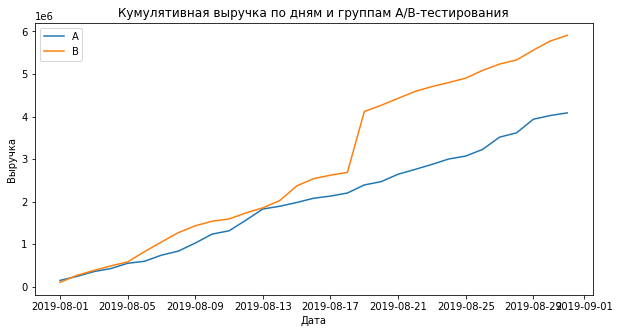

In [15]:
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

#размер графика
plt.figure(figsize=(10,5)) 
#строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
#строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B') 
plt.legend() 
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.show() 

**Вывод:**
Выручка в обеих группах растет. Группа `B` лидирует на протяжении всего месяца и у группы `B` произошел скачок приблизительно 18.08.2019 - это может быть резкое повышение числа заказов.

**2.Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.**

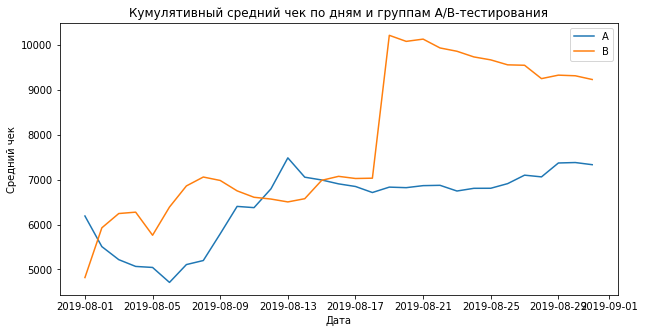

In [16]:
plt.figure(figsize=(10,5)) 
#построим графики, что бы получить средний чек - группа A
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
#построим графики, что бы получить средний чек - группа B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования')
plt.show() 

**Вывод:**
На графике можно наблюдать резкий скачок у группы `B` приблизительно 18.08.2019. После 21.08.2019 коммулятивный средний чек группы `B` снижается, а группы `A` растет, но при этом средний чек у группы `B` выше.

**3.Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.**

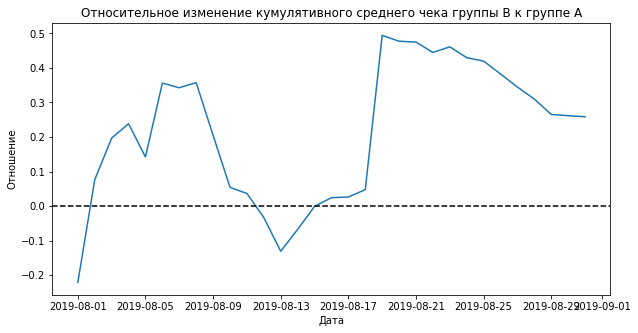

In [17]:
#объединяем таблицы cumulative_revenue_a и cumulative_revenue_b
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

#строим графики
plt.figure(figsize=(10,5)) 
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1)

#добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.xlabel('Дата')
plt.ylabel('Отношение') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.show()   

**Вывод:**
На графике можно наблюдать резкие скачки и ранее наблюдаемый скачок приблизительно 18.08.2019 сохраняется. Возможно, именно в эти дни были сделаны дорогие заказы.

**4.Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.**

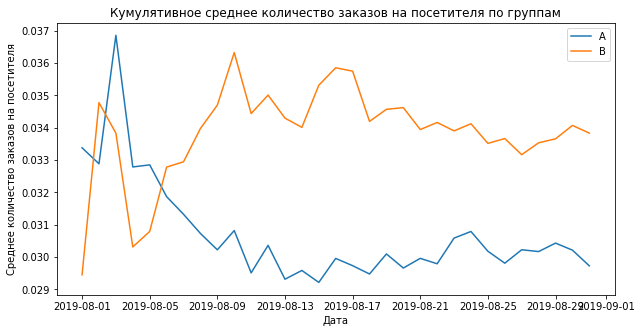

In [18]:
#считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

#отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

#отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

#строим графики
plt.figure(figsize=(10,5)) 
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')

plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя') 
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.show()  

**Вывод:**
На графике можем увидеть, что в начале обе группы находились примерно у одного значения. Далее группа `B` выросла, а группа `A` снизилась. Среднее количество заказов на посетителя в группе В больше.

**5.Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.**

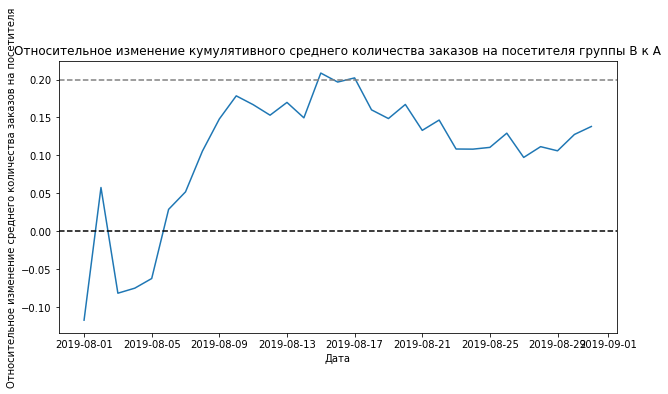

In [19]:
#объединяем таблицы cumulative_data_a и cumulative_data_b
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

#строим графики
plt.figure(figsize=(10,5)) 
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversion_b']/merged_cumulative_conversions['conversion_a']-1)

#добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.ylabel('Относительное изменение среднего количества заказов на посетителя') 
plt.xlabel('Дата') 
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы В к А') 
plt.show()

**Вывод:**
На графике можно увидеть, что в начале среднее количество заказов резко поднималось, а потом опускалось. Но примерно 06.08.2019, получили стабильный прирост, который привысил 20% и установился в пределах от 10 до 15 % к концу периода. Группа `B` лидирует по среднему количеству заказов.

**6.Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.**

In [20]:
#создадим сводную таблицу с кол-вом закзазов для каждого пользователя 
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
#переименуем столбцы 
orders_by_users.columns = ['user_id', 'orders']
#выведем таблицу отсортиованную по убыванию кол-ва заказов 
orders_by_users.sort_values(by='orders', ascending=False).head(10) 

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


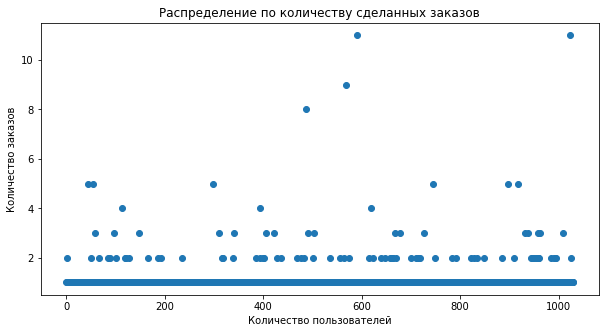

In [21]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(orders_by_users)))

#строим график
plt.figure(figsize=(10,5)) 
plt.scatter(x_values, orders_by_users['orders']) 

plt.ylabel('Количество заказов') 
plt.xlabel('Количество пользователей') 
plt.title('Распределение по количеству сделанных заказов') 
plt.show() 

**Вывод:**
По графику можно сделать вывод, что большинство пользователей не совершает более 2 заказов.

**7.Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.**

In [22]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


**Вывод:** Не более 5 % совершили больше 2-х заказов. Не более 1 % совершили больше 4-х заказов.
Установим границу по колличеству заказов на пользователя в 3 шт.

**8.Построим точечный график стоимостей заказов. Сделаем выводы и предположения.**

In [23]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

      transaction_id  visitor_id        date  revenue group
425        590470918  1920142716  2019-08-19  1294500     B
1196      3936777065  2108080724  2019-08-15   202740     B
858        192721366  1316129916  2019-08-27    93940     A
1136       666610489  1307669133  2019-08-13    92550     A
744       3668308183   888512513  2019-08-27    86620     B
682       1216533772  4266935830  2019-08-29    78990     B
662       1811671147  4266935830  2019-08-29    78990     A
743       3603576309  4133034833  2019-08-09    67990     A
1103      1348774318  1164614297  2019-08-12    66350     A
1099       316924019   148427295  2019-08-12    65710     A


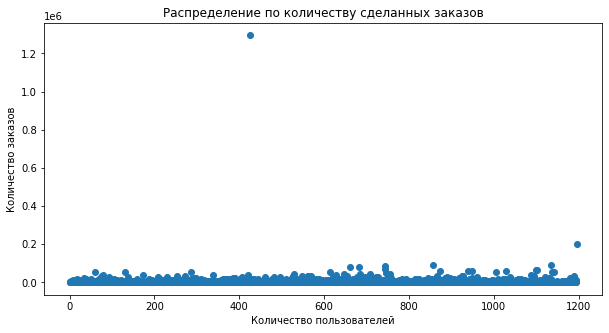

In [24]:
x_values = pd.Series(range(0, len(orders['revenue'])))

#строим график
plt.figure(figsize=(10,5)) 
plt.scatter(x_values, orders['revenue']) 

plt.ylabel('Количество заказов') 
plt.xlabel('Количество пользователей') 
plt.title('Распределение по количеству сделанных заказов') 
plt.show() 

**Вывод:** По графику можно сделать выводы, что в среднем стоимость заказов не превышает 200 000р, есть пару выбросов (около 200 тыс. и 1,2 млн.).

**9.Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.**

In [25]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Вывод:** Не более 5 % заказов стомостью более 28000 рублей. Не более 1 % заказов стомостью более 58000 рублей. Установим границу по сумме заказа в 30000 рублей.

**10.Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.**

***Сформулируем гипотезы***

- H0: различий в среднем количестве заказов на посетителя между группами нет.
- H1: различия в среднем количестве заказов на посетителя между группами есть.
- Коэффициент альфа: 0.05.

In [26]:
#таблицы с данными по заказам на каждого пользователя
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

orders_by_users_a.columns = ['visitor_id', 'orders']


orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

orders_by_users_b.columns = ['visitor_id', 'orders']

In [27]:
#объявим переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя. 
#а пользователям без заказов — нули. 
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

In [28]:
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


print('Значение P-value:', '{0:.5f}'.format(stats.mannwhitneyu(sample_a, sample_b)[1]))
print('Относительная разница между группами:', '{0:.3f}'.format((sample_b.mean()/sample_a.mean()-1)))

Значение P-value: 0.01679
Относительная разница между группами: 0.138


**Вывод:** 
- P-value меньше 0.05 - отвергаем нулевую гипотезу. Соответственно, статистически значемые различия в среднем количестве заказов на посетителя между группами есть. 
- Относительный прирост среднего группы В к группе А - 0.138, то есть ~14%.

**11.Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.**

***Сформулируем гипотезы***

- H0: различий в среднем чеке заказа между группами нет.
- H1: различия в среднем чеке заказа между группами есть.
- Коэффициент альфа: 0.05.

In [29]:
print('Значение P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница между группами:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение P-value: 0.729
Относительная разница между группами: 0.259


**Вывод:**
- P-value больше 0.05 - принимаем нулевую гипотезу. Соответственно, статистически значимых различий в среднем чеке заказа между группами нет. 
- Относительный прирост среднего чека группы В к группе А - 0.259, то есть ~26%.

**12.Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.**

- H0: различий в среднем количестве заказов на посетителя между группами нет.
- H1: различия в среднем количестве заказов на посетителя между группами есть.
- Коэффициент альфа: 0.05.

In [30]:
#3 - заказы
#30000 - сумма

#пользователи с большим кол-вом заказов 
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 3]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 3]['visitor_id'],
    ],
    axis=0,
)
#пользователи с дорогими заказами
users_with_expensive_orders = orders[orders['revenue'] > 30000]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormal_users.head(5))
print('Количество аномальных пользователей: ', abnormal_users.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitor_id, dtype: int64
Количество аномальных пользователей:  57


In [31]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
               visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('Значение P-value:', '{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительная разница между группами:', '{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

Значение P-value: 0.018
Относительная разница между группами: 0.148


**Вывод:** 
- После удаления аномальных пользователей P-value так же меньше 0.05 - отвергаем нулевую гипотезу. Соответственно, статистически значемые различия в среднем количестве заказов на посетителя между группами есть. 
- Относительный прирост среднего группы В к группе А вырос - 0.148, то есть ~15%.

**13.Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.**

- H0: различий в среднем чеке заказа между группами нет.
- H1: различия в среднем чеке заказа между группами есть.
- Коэффициент альфа: 0.05.

In [32]:
print('Значение P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительная разница между группами:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Значение P-value: 0.958
Относительная разница между группами: -0.020


**Вывод:** 
- Как и в случае с "сырыми" данными, P-value больше 0.05 - принимаем нулевую гипотезу. Соответственно, статистически значимых различий в среднем чеке заказа между группами нет. 
- Относительный прирост среднего чека группы В к группе А - (-0.020). Разница между сегментами сократилась с 26% до практически нулевой, средний чек в группе B стал незначительно ниже чем в группе A.

**14.Примем решение по результатам теста и объясним его:**

Остановить тест, зафиксировать победу группы `B`.

Основываясь на результатах теста можно сказать, что по среднему количеству заказов (по "сырым" данным ~14%, по "очищенным" ~15%) показатели ялвляются статистически значимыми и побеждает группа `В`. По среднему чеку различия отсутсвуют.

**Вывод по разделу 3:**

- Выручка в обеих группах растет. Группа `B` лидирует на протяжении всего месяца и у группы `B` произошел скачок приблизительно 18.08.2019 - это может быть резкое повышение числа заказов.
- На графике можно наблюдать резкий скачок у группы `B` приблизительно 18.08.2019. После 21.08.2019 коммулятивный средний чек группы `B` снижается, а группы `A` растет, но при этом средний чек у группы `B` выше.
- На графике можно наблюдать резкие скачки и ранее наблюдаемый скачок приблизительно 18.08.2019 сохраняется. Возможно, именно в эти дни были сделаны дорогие заказы.
- На графике можем увидеть, что в начале обе группы находились примерно у одного значения. Далее группа `B` выросла, а группа `A` снизилась. Среднее количество заказов на посетителя в группе `В` явно больше.
- На графике можно увидеть, что в начале среднее количество заказов резко поднималось, а потом опускалось. Но примерно 06.08.2019, получили стабильный прирост, который привысил 20% и установился в пределах от 10 до 15 % к концу периода. Группа `B` лидирует по среднему количеству заказов.
- По графику можно сделать вывод, что большинство пользователей не совершает более 2 заказов.
- Не более 5 % совершили больше 2-х заказов. Не более 1 % совершили больше 4-х заказов. Установим границу по колличеству заказов на пользователя в 3 шт.
- По графику можно сделать выводы, что в среднем стоимость заказов не превышает 200 000р, есть пару выбросов (около 200 тыс. и 1,2 млн.).
- Не более 5 % заказов стомостью более 28000 рублей. Не более 1 % заказов стомостью более 58000 рублей. Установим границу по сумме заказа в 30000 рублей.
- P-value меньше 0.05 - отвергаем нулевую гипотезу. Соответственно, статистически значемые различия в среднем количестве заказов на посетителя между группами есть. Относительный прирост среднего группы В к группе А - 0.138, то есть ~14%.
- P-value больше 0.05 - принимаем нулевую гипотезу. Соответственно, статистически значимых различий в среднем чеке заказа между группами нет. Относительный прирост среднего чека группы В к группе А - 0.259, то есть ~26%.
- После удаления аномальных пользователей P-value так же меньше 0.05 - отвергаем нулевую гипотезу. Соответственно, статистически значемые различия в среднем количестве заказов на посетителя между группами есть. Относительный прирост среднего группы В к группе А вырос - 0.148, то есть ~15%.
- Как и в случае с "сырыми" данными, P-value больше 0.05 - принимаем нулевую гипотезу. Соответственно, статистически значимых различий в среднем чеке заказа между группами нет. Относительный прирост среднего чека группы В к группе А - (-0.020). Разница между сегментами сократилась с 26% до практически нулевой, средний чек в группе B стал незначительно ниже чем в группе A.
- Основываясь на результатах теста можно сказать, что по среднему количеству заказов (по "сырым" данным ~14%, по "очищенным" ~15%) показатели ялвляются статистически значимыми и побеждает группа `В`. По среднему чеку различия отсутсвуют.

**Приняли решение по результатам остановить тест, зафиксировать победу группы `B`**

### Общий вывод по проекту.

**Вывод по разделу 1:**

В данных:
- `hypothesis` (гипотезы) 9 записи.
- `orders` (заказы) 1197 записи.
- `visitors` (посетители) 62 записи.
- привели названия всех столбцов к нижниму регистру у `hypothesis` и изменили названия двух столбцов у `orders`.
- привели к типу даты столбцы: `date` у `orders` и `visitors`.
- пропущенных значений и дубликатов в таблицах нет.

Данные признаны полными и достаточными для исследования.


**Вывод по разделу 2:**

По фреймворку ICE наиболее приоритетными были гипотезы 8,0 и 7. 
- 8 - Запустить акцию, дающую скидку на товар в день рождения
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

После применения фреймворка RICE приоритеты изменились на гпиотезы 7,2 и 0. 
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Это произошло потому что фреймворк RICE учитывает параметр Reach (скольких пользователей затронет изменение, которое вы хотите внести), и в лидеры вышли гипотезы с наибольшим охватом пользователей.

В нашем случае наиболее приоритетными гипотезами будут - 7, 2, 0:
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей


**Вывод по разделу 3:**

- Выручка в обеих группах растет. Группа `B` лидирует на протяжении всего месяца и у группы `B` произошел скачок приблизительно 18.08.2019 - это может быть резкое повышение числа заказов.
- На графике можно наблюдать резкий скачок у группы `B` приблизительно 18.08.2019. После 21.08.2019 коммулятивный средний чек группы `B` снижается, а группы `A` растет, но при этом средний чек у группы `B` выше.
- На графике можно наблюдать резкие скачки и ранее наблюдаемый скачок приблизительно 18.08.2019 сохраняется. Возможно, именно в эти дни были сделаны дорогие заказы.
- На графике можем увидеть, что в начале обе группы находились примерно у одного значения. Далее группа `B` выросла, а группа `A` снизилась. Среднее количество заказов на посетителя в группе `В` явно больше.
- На графике можно увидеть, что в начале среднее количество заказов резко поднималось, а потом опускалось. Но примерно 06.08.2019, получили стабильный прирост, который привысил 20% и установился в пределах от 10 до 15 % к концу периода. Группа `B` лидирует по среднему количеству заказов.
- По графику можно сделать вывод, что большинство пользователей не совершает более 2 заказов.
- Не более 5 % совершили больше 2-х заказов. Не более 1 % совершили больше 4-х заказов. Установим границу по колличеству заказов на пользователя в 3 шт.
- По графику можно сделать выводы, что в среднем стоимость заказов не превышает 200 000р, есть пару выбросов (около 200 тыс. и 1,2 млн.).
- Не более 5 % заказов стомостью более 28000 рублей. Не более 1 % заказов стомостью более 58000 рублей. Установим границу по сумме заказа в 30000 рублей.
- P-value меньше 0.05 - отвергаем нулевую гипотезу. Соответственно, статистически значемые различия в среднем количестве заказов на посетителя между группами есть. Относительный прирост среднего группы В к группе А - 0.138, то есть ~14%.
- P-value больше 0.05 - принимаем нулевую гипотезу. Соответственно, статистически значимых различий в среднем чеке заказа между группами нет. Относительный прирост среднего чека группы В к группе А - 0.259, то есть ~26%.
- После удаления аномальных пользователей P-value так же меньше 0.05 - отвергаем нулевую гипотезу. Соответственно, статистически значемые различия в среднем количестве заказов на посетителя между группами есть. Относительный прирост среднего группы В к группе А вырос - 0.148, то есть ~15%. 
- Как и в случае с "сырыми" данными, P-value больше 0.05 - принимаем нулевую гипотезу. Соответственно, статистически значимых различий в среднем чеке заказа между группами нет. Относительный прирост среднего чека группы В к группе А - (-0.020). Разница между сегментами сократилась с 26% до практически нулевой, средний чек в группе B стал незначительно ниже чем в группе A.
- Основываясь на результатах теста можно сказать, что по среднему количеству заказов (по "сырым" данным ~14%, по "очищенным" ~15%) показатели ялвляются статистически значимыми и побеждает группа `В`. По среднему чеку различия отсутсвуют.

**Приняли решение по результатам остановить тест, зафиксировать победу группы `B`**